In [1]:
import pandas as pd
import numpy as np

### Import and read data

In [2]:
df = pd.read_csv("../data_files/UTSEUS-anjuke-real-estate-baoshan.csv")
df.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


### Get the data we care about

In [3]:
data_mod = df[['longitude','latitude','bedroom','room','surface','price','onesquaremeter']]
data_mod.head()

,longitude,latitude,bedroom,room,surface,price,onesquaremeter
0,121.343927,31.319356,2,2,30.0,1160000.0,38666.666667
1,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474
2,121.397487,31.290871,3,2,92.0,5350000.0,58152.173913
3,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235
4,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000


### Small plots to understand the da

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
sns.set()

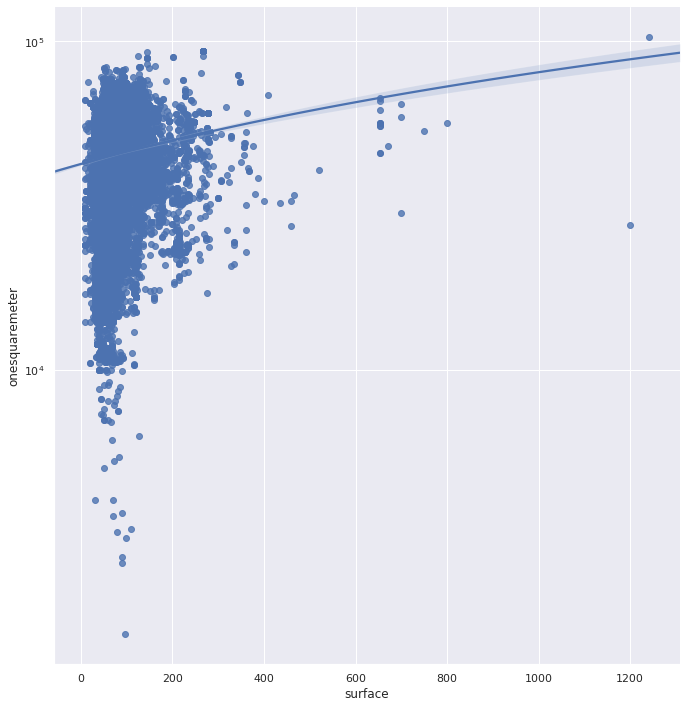

In [6]:
sns.lmplot(x='surface', y='onesquaremeter', data=data_mod, height=10)
plt.yscale('log')
#plt.xscale('log')

### Scale the data

In [7]:
# Scale the data
# Purpose : put all the data on the same axis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_mod['lat_scale'] = scaler.fit_transform(data_mod[['latitude']])
data_mod['lon_scale'] = scaler.fit_transform(data_mod[['longitude']])
data_mod['bedr_scale'] = scaler.fit_transform(data_mod[['bedroom']])
data_mod['room_scale'] = scaler.fit_transform(data_mod[['room']])
data_mod['surf_scale'] = scaler.fit_transform(data_mod[['surface']])

/home/aitian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/aitian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aitian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

### Add categorical data

In [8]:
# Add categorical data
price = data_mod['onesquaremeter']
y = pd.DataFrame.copy(price)

y[price <= np.quantile(price, 0.25)] = "Very Cheap"
y[(price > np.quantile(price, 0.25)) & (price <= np.quantile(price, 0.5))] = "Cheap"
y[(price > np.quantile(price, 0.5)) & (price <= np.quantile(price, 0.75))] = "Expensive"
y[price > np.quantile(price, 0.75)] = "Very Expensive"

### Separate the original data and the data used in the algorithm

In [9]:
# Separate df data and ML data
data = data_mod[['lat_scale','lon_scale','bedr_scale','room_scale','surf_scale']]

### Training and Testing sets creation

In [10]:
# Create the different sets of data (training/testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, shuffle=True)

### Model part
#### Create - Train - Predict

In [11]:
# Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

/home/aitian/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Print results

In [12]:
# Show the results
# print(rfc.score(X_test, y_test))
# or 
from sklearn.metrics import classification_report
#print(classification_report(y_test, y_predict))
# or
# np.mean(y_test == y_predict)
# or 
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Cheap,Expensive,Very Cheap,Very Expensive,All
True,,,,,
Cheap,1807,428,224,112,2571
Expensive,433,1749,117,318,2617
Very Cheap,304,98,2127,36,2565
Very Expensive,70,282,50,2170,2572
All,2614,2557,2518,2636,10325
